In [1]:
# import libraries used throughout the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn import svm, metrics, pipeline, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
#check version
sklearn.__version__

'1.3.1'

In [98]:
data = pd.read_csv('data/student-por.csv', delimiter=';')
data_m = pd.read_csv('data/student-mat.csv', delimiter=';')

data.groupby('Medu')['G3'].median()
data_m.groupby('Medu')['G3'].median()

#correlation between medu and g3
data[['Medu', 'Fedu', 'G3']].corr()


,Medu,Fedu,G3
Medu,1.000000,0.647477,0.240151
Fedu,0.647477,1.000000,0.211800
G3,0.240151,0.211800,1.000000


In [100]:
#lin regression
import statsmodels.api as sm

X = data[['Medu', 'Fedu']]
X = sm.add_constant(X)
y = data['G3']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     21.77
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           7.12e-10
Time:                        18:19:32   Log-Likelihood:                -1660.3
No. Observations:                 649   AIC:                             3327.
Df Residuals:                     646   BIC:                             3340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9791      0.318     31.417      0.000       9.355      10.603
Medu           0.5051      0.142      3.550      0.000       0.226       0.784
Fedu           0.2848      0.147      1.940      0.053      -0.003       0.573
==============================================================================
Omnibus:                      128.383   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.701
Skew:                          -0.977   Prob(JB):                     2.12e-78
Kurtosis:                       6.068   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
 
X = data_m[['Medu', 'Fedu']]
X = sm.add_constant(X)
y = data_m['G3']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.802
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           7.01e-05
Time:                        18:21:56   Log-Likelihood:                -1151.5
No. Observations:                 395   AIC:                             2309.
Df Residuals:                     392   BIC:                             2321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8205      0.648     12.073      0.000       6.547       9.094
Medu           0.8359      0.264      3.168      0.002       0.317       1.355
Fedu           0.1176      0.265      0.443      0.658      -0.404       0.639
==============================================================================
Omnibus:                       34.382   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.826
Skew:                          -0.765   Prob(JB):                     1.36e-09
Kurtosis:                       3.375   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const         float64
school         object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
fatherd        object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
dtype: object. The data was
0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64
and
      const school  age address famsize Pstatus  Medu  Fedu      Mjob  \
0      1.0     GP   18       U     GT3       A     4     4   at_home   
1      1.0     GP   17       U     GT3       T     1     1   at_home   
2      1.0     GP   15       U     LE3       T     1     1   at_home   
3      1.0     GP   15       U     GT3       T     4     2    health   
4      1.0     GP   16       U     GT3       T     3     3     other   
..     ...    ...  ...     ...     ...     ...   ...   ...       ...   
644    1.0     MS   19       R     GT3       T     2     3  services   
645    1.0     MS   18       U     LE3       T     3     1   teacher   
646    1.0     MS   18       U     GT3       T     1     1     other   
647    1.0     MS   17       U     LE3       T     3     1  services   
648    1.0     MS   18       R     LE3       T     3     2  services   

         Fjob  ... romantic famrel  freetime  goout  Dalc Walc health  \
0     teacher  ...       no      4         3      4     1    1      3   
1       other  ...       no      5         3      3     1    1      3   
2       other  ...       no      4         3      2     2    3      3   
3    services  ...      yes      3         2      2     1    1      5   
4       other  ...       no      4         3      2     1    2      5   
..        ...  ...      ...    ...       ...    ...   ...  ...    ...   
644     other  ...       no      5         4      2     1    2      5   
645  services  ...       no      4         3      4     1    1      1   
646     other  ...       no      1         1      1     1    1      5   
647  services  ...       no      2         4      5     3    4      2   
648     other  ...       no      4         4      1     3    4      5   

    absences  G1  G2  
0          4   0  11  
1          2   9  11  
2          6  12  13  
3          0  14  14  
4          0  11  13  
..       ...  ..  ..  
644        4  10  11  
645        4  15  15  
646        6  11  12  
647        6  10  10  
648        4  10  11  

[649 rows x 32 columns]
before. After,
[11 11 12 14 13 13 13 13 17 13 14 13 12 13 15 17 14 14  7 12 14 12 14 10
 10 12 12 11 13 12 11 15 15 12 12 11 14 13 12 12 10 11 15 10 11 11 13 17
 13 12 13 16  9 12 13 12 15 16 14 16 16 16 10 13 12 16 12 10 11 15 11 10
 11 14 11 11 11 13 10 11 12  9 11 13 12 12 11 15 11 10 11 13 12 14 12 13
 11 12 13 13  8 16 12 10 16 10 10 14 11 14 14 11 10 18 10 14 16 15 11 14
 14 13 13 13 11  9 11 11 15 13 12  8 11 13 12 14 11 11 11 15 10 13 12 11
 11 10 10 14  9 11  9 13 11 13 11  6 12 10 11 13 11  8 11  0 10 13 11 13
  8 10 11 11  1 10  9  8 10  8  8  8 11 18 13 17 10 18 10 13 15 11 14 10
 11 13 11 13 17 14 16 14 11 16 14 10 13 12 12 10 12 16 14 12 16 11 15 12
 15 13 13  8 12 15 13 12 12 12 13 11 11 15 10 10 13 13 11 12 14 10 16  8
 17 11 11 16 12 13 13 14  9 12 16 10 13 10 10  7  8  9 15 10 11 13  8  8
 10 15 14 15 12 15 15 12 15 11 10 11 16 11 13  5 10 11  7 10  6 12 13 10
 13 17 11 11 14 14 13 14 16 10 12 12 15 11 12 13 13  9 16 14 12 14 10 12
 16 13 18 15 16 12 10 12 13 15 10 10 11 10 13 18 13 14 14 12 18 14 15 17
 16 18 19 15 15 13 14 17 17 15 13  8 16 18 11 15 11 11 15 14 17 17 15 17
 14 10 13 14 17 17 13 14 11 11  9 10 13 10 17 15 14 13 17 10 13 15 11 12
 10 10 15 15 12 12 14 14 15 15 16 13 17 14 14 17 17 14 13 15 16 11 13 12
 12 15 17 15 17 10 15 11 18 17 14 11 17 10 13 11 12 10 11 17  9 11 11 10
  7 14 11 10  8 12 12 16  0  9 14  8 11  9 11  9 17 13 15 11 11  8  8  9
 15 11 13 10 11 14 14 12 11  8 11 14 13 13 12 12 16 10 11 14  8 11  8 10
 10 11  9 11  8 11 10 10  9 10 10  9 10 10  9 13 14 10 14 16  7 13  9 14
 13 11 10 10  9 18 17 10  7  8  7 10 16 15  8  0  8 10  8  6  8 16 14 10
  9 11  9 10  8 16 12 10 14 12 11 10 11 11 12  8 12  8 16 11 11 18 13 13
 10 12 10 13 11 10 10 13 10 10 12  0 10  9  9  0  9  8  8  9  7 10 10 10
 11 11 10  9 10  8  7  0 11  8  0  8  9 10  7 14 13 14 18 17 18  0 11 14
 14 10 13  0 10  0 18 12 11 12  0 15 11 10 12 15 14 18 15 13 15 13  9 16
  9 10  0 10 12  9 17 12  9 14 16  9 19  0 16  0  0 15 11 10 10 16  9 10
 11]
[[1.0 'GP' 18 ... 4 0 11]
 [1.0 'GP' 17 ... 2 9 11]
 [1.0 'GP' 15 ... 6 12 13]
 ...
 [1.0 'MS' 18 ... 6 11 12]
 [1.0 'MS' 17 ... 6 10 10]
 [1.0 'MS' 18 ... 4 10 11]].

In [69]:
data_binaryG3 = data.replace(to_replace=['M', 'F'], value=[0,1]) #sex


# Assuming df is your DataFrame and 'column_to_recode' is the column you want to recode
data['G3_binary'] = data['G3'].apply(lambda x: 1 if x > 9 else 0)

data.groupby('sex')['G3_binary'].mean()


sex
F    0.869452
M    0.812030
Name: G3_binary, dtype: float64

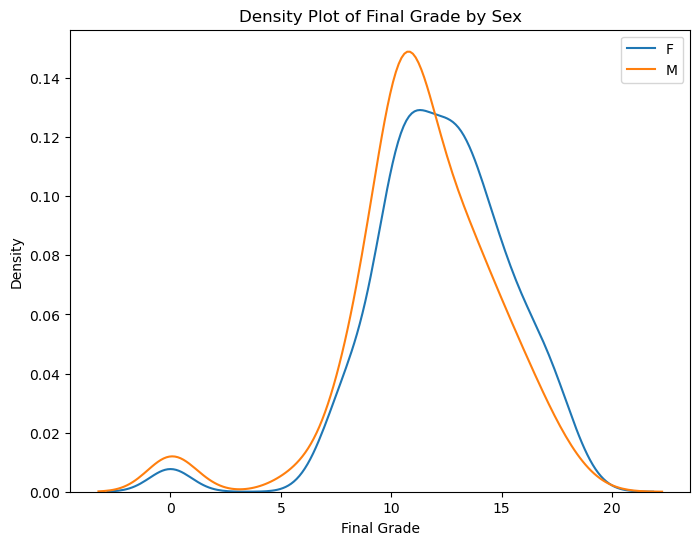

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'sex' and 'final_grade' are the columns
plt.figure(figsize=(8, 6))
for sex in data['sex'].unique():
    sns.kdeplot(data[data['sex'] == sex]['G3'], label=sex)

plt.title('Density Plot of Final Grade by Sex')
plt.xlabel('Final Grade')
plt.ylabel('Density')
plt.legend()
plt.show()


The dataset we use is from the paper <a href="https://www.researchgate.net/publication/228780408_Using_data_mining_to_predict_secondary_school_student_performance">Using data mining to predict secondary school student performance</a> by Paulo Cortez and Alice Silva.

In [107]:
data = pd.read_csv('data/student-por.csv', delimiter=';')
# heatmap requires numerical values
data = data.replace(to_replace=['M', 'F'], value=[0,1]) #sex
data = data.replace(to_replace=['GP', 'MS'], value=[0,1]) #school
data = data.replace(to_replace=['A', 'T'], value=[0,1]) #Pstatus
data = data.replace(to_replace=['GT3', 'LE3'], value=[0,1]) #famsize
data = data.replace(to_replace=['U', 'R'], value=[0,1]) #address
data = data.replace(to_replace=['father', 'mother'], value=[0,1]) #guardian
data = data.replace(to_replace=['at_home', 'health', 'other', 'services', 'teacher'], value=[0,1,2,3,4]) #Mjob, Fjob
data = data.replace(to_replace=['course', 'other', 'home', 'reputation'], value=[0,1,2,3]) #reason
data = data.replace(to_replace=['no', 'yes'], value=[0,1]) #fatherd, nursery, higher, famsup, romantic
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,0,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,0,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,0,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,0,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [109]:
#math data***
data = pd.read_csv('data/student-mat.csv', delimiter=';')
# heatmap requires numerical values
data = data.replace(to_replace=['M', 'F'], value=[0,1]) #sex
data = data.replace(to_replace=['GP', 'MS'], value=[0,1]) #school
data = data.replace(to_replace=['A', 'T'], value=[0,1]) #Pstatus
data = data.replace(to_replace=['GT3', 'LE3'], value=[0,1]) #famsize
data = data.replace(to_replace=['U', 'R'], value=[0,1]) #address
data = data.replace(to_replace=['father', 'mother'], value=[0,1]) #guardian
data = data.replace(to_replace=['at_home', 'health', 'other', 'services', 'teacher'], value=[0,1,2,3,4]) #Mjob, Fjob
data = data.replace(to_replace=['course', 'other', 'home', 'reputation'], value=[0,1,2,3]) #reason
data = data.replace(to_replace=['no', 'yes'], value=[0,1]) #fatherd, nursery, higher, famsup, romantic
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


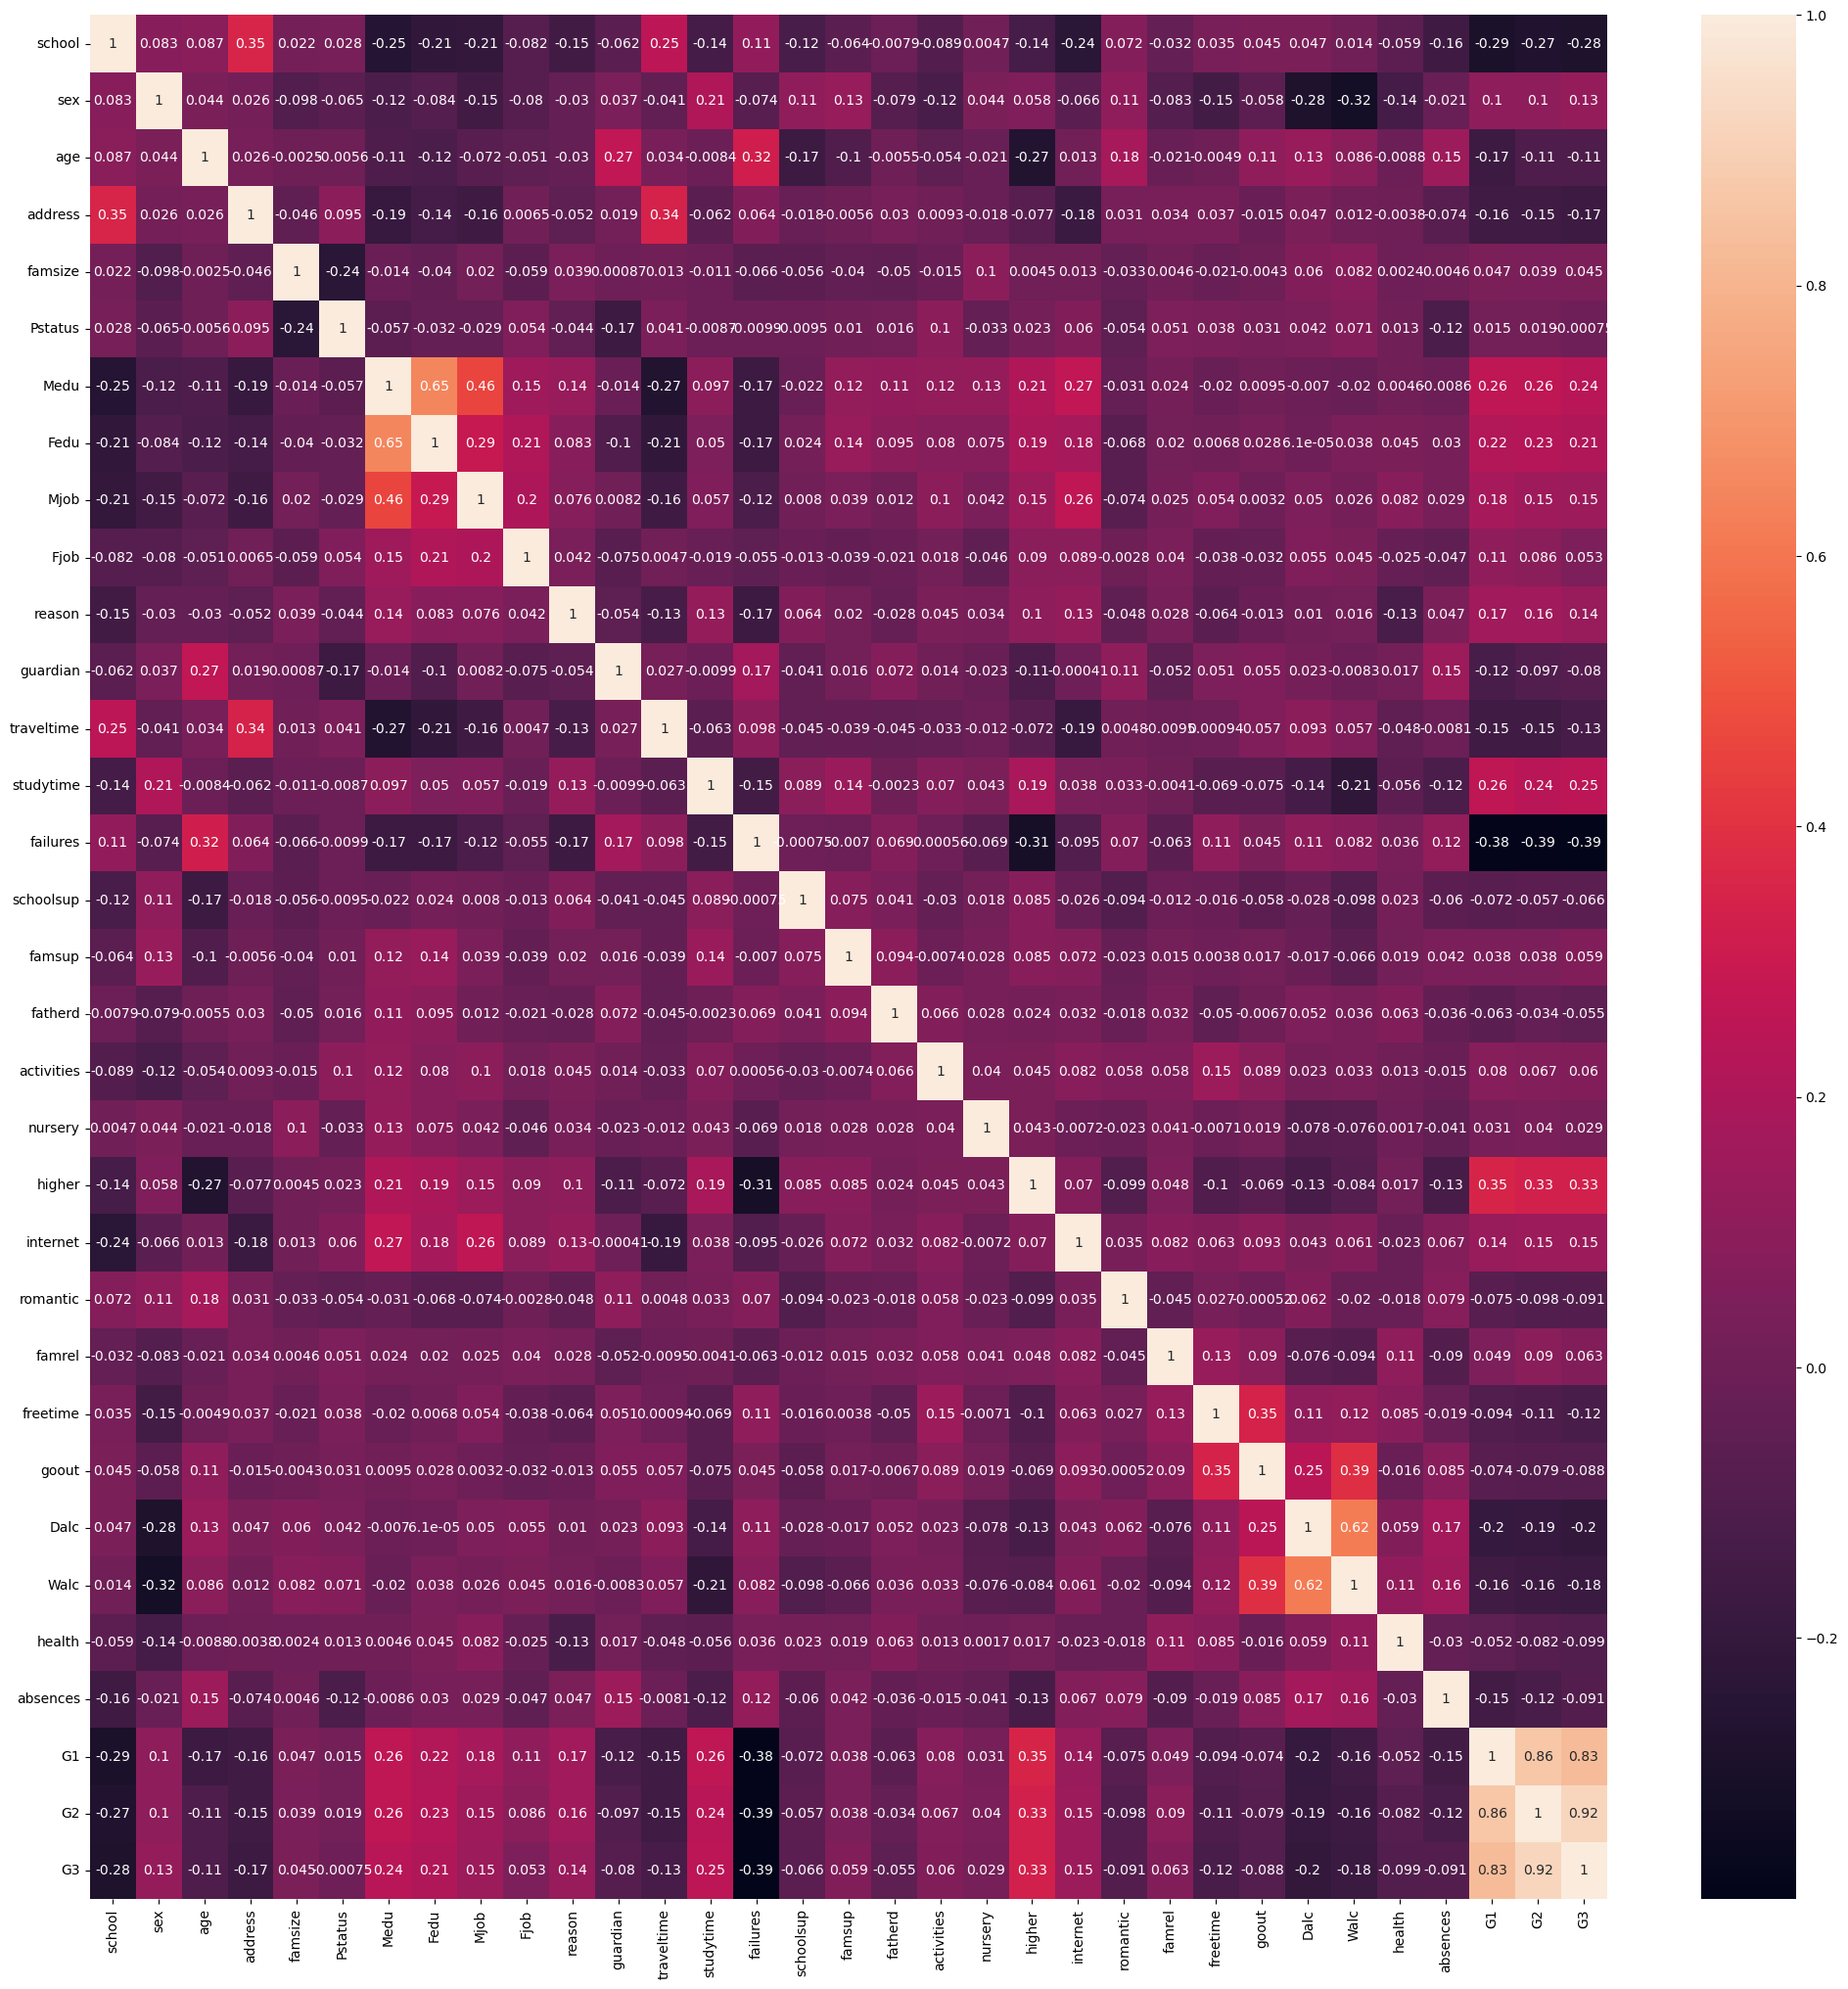

In [97]:
# add correlation matrix to see which features are highly correlated
corr_data = data.select_dtypes(include='number')
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(corr, annot=True)

# features highly correlated with sex: Dalc(-), Walc(-), studytime, freetime(-), Mjob(-), health(-), G3, famsup, Medu(-), romanti

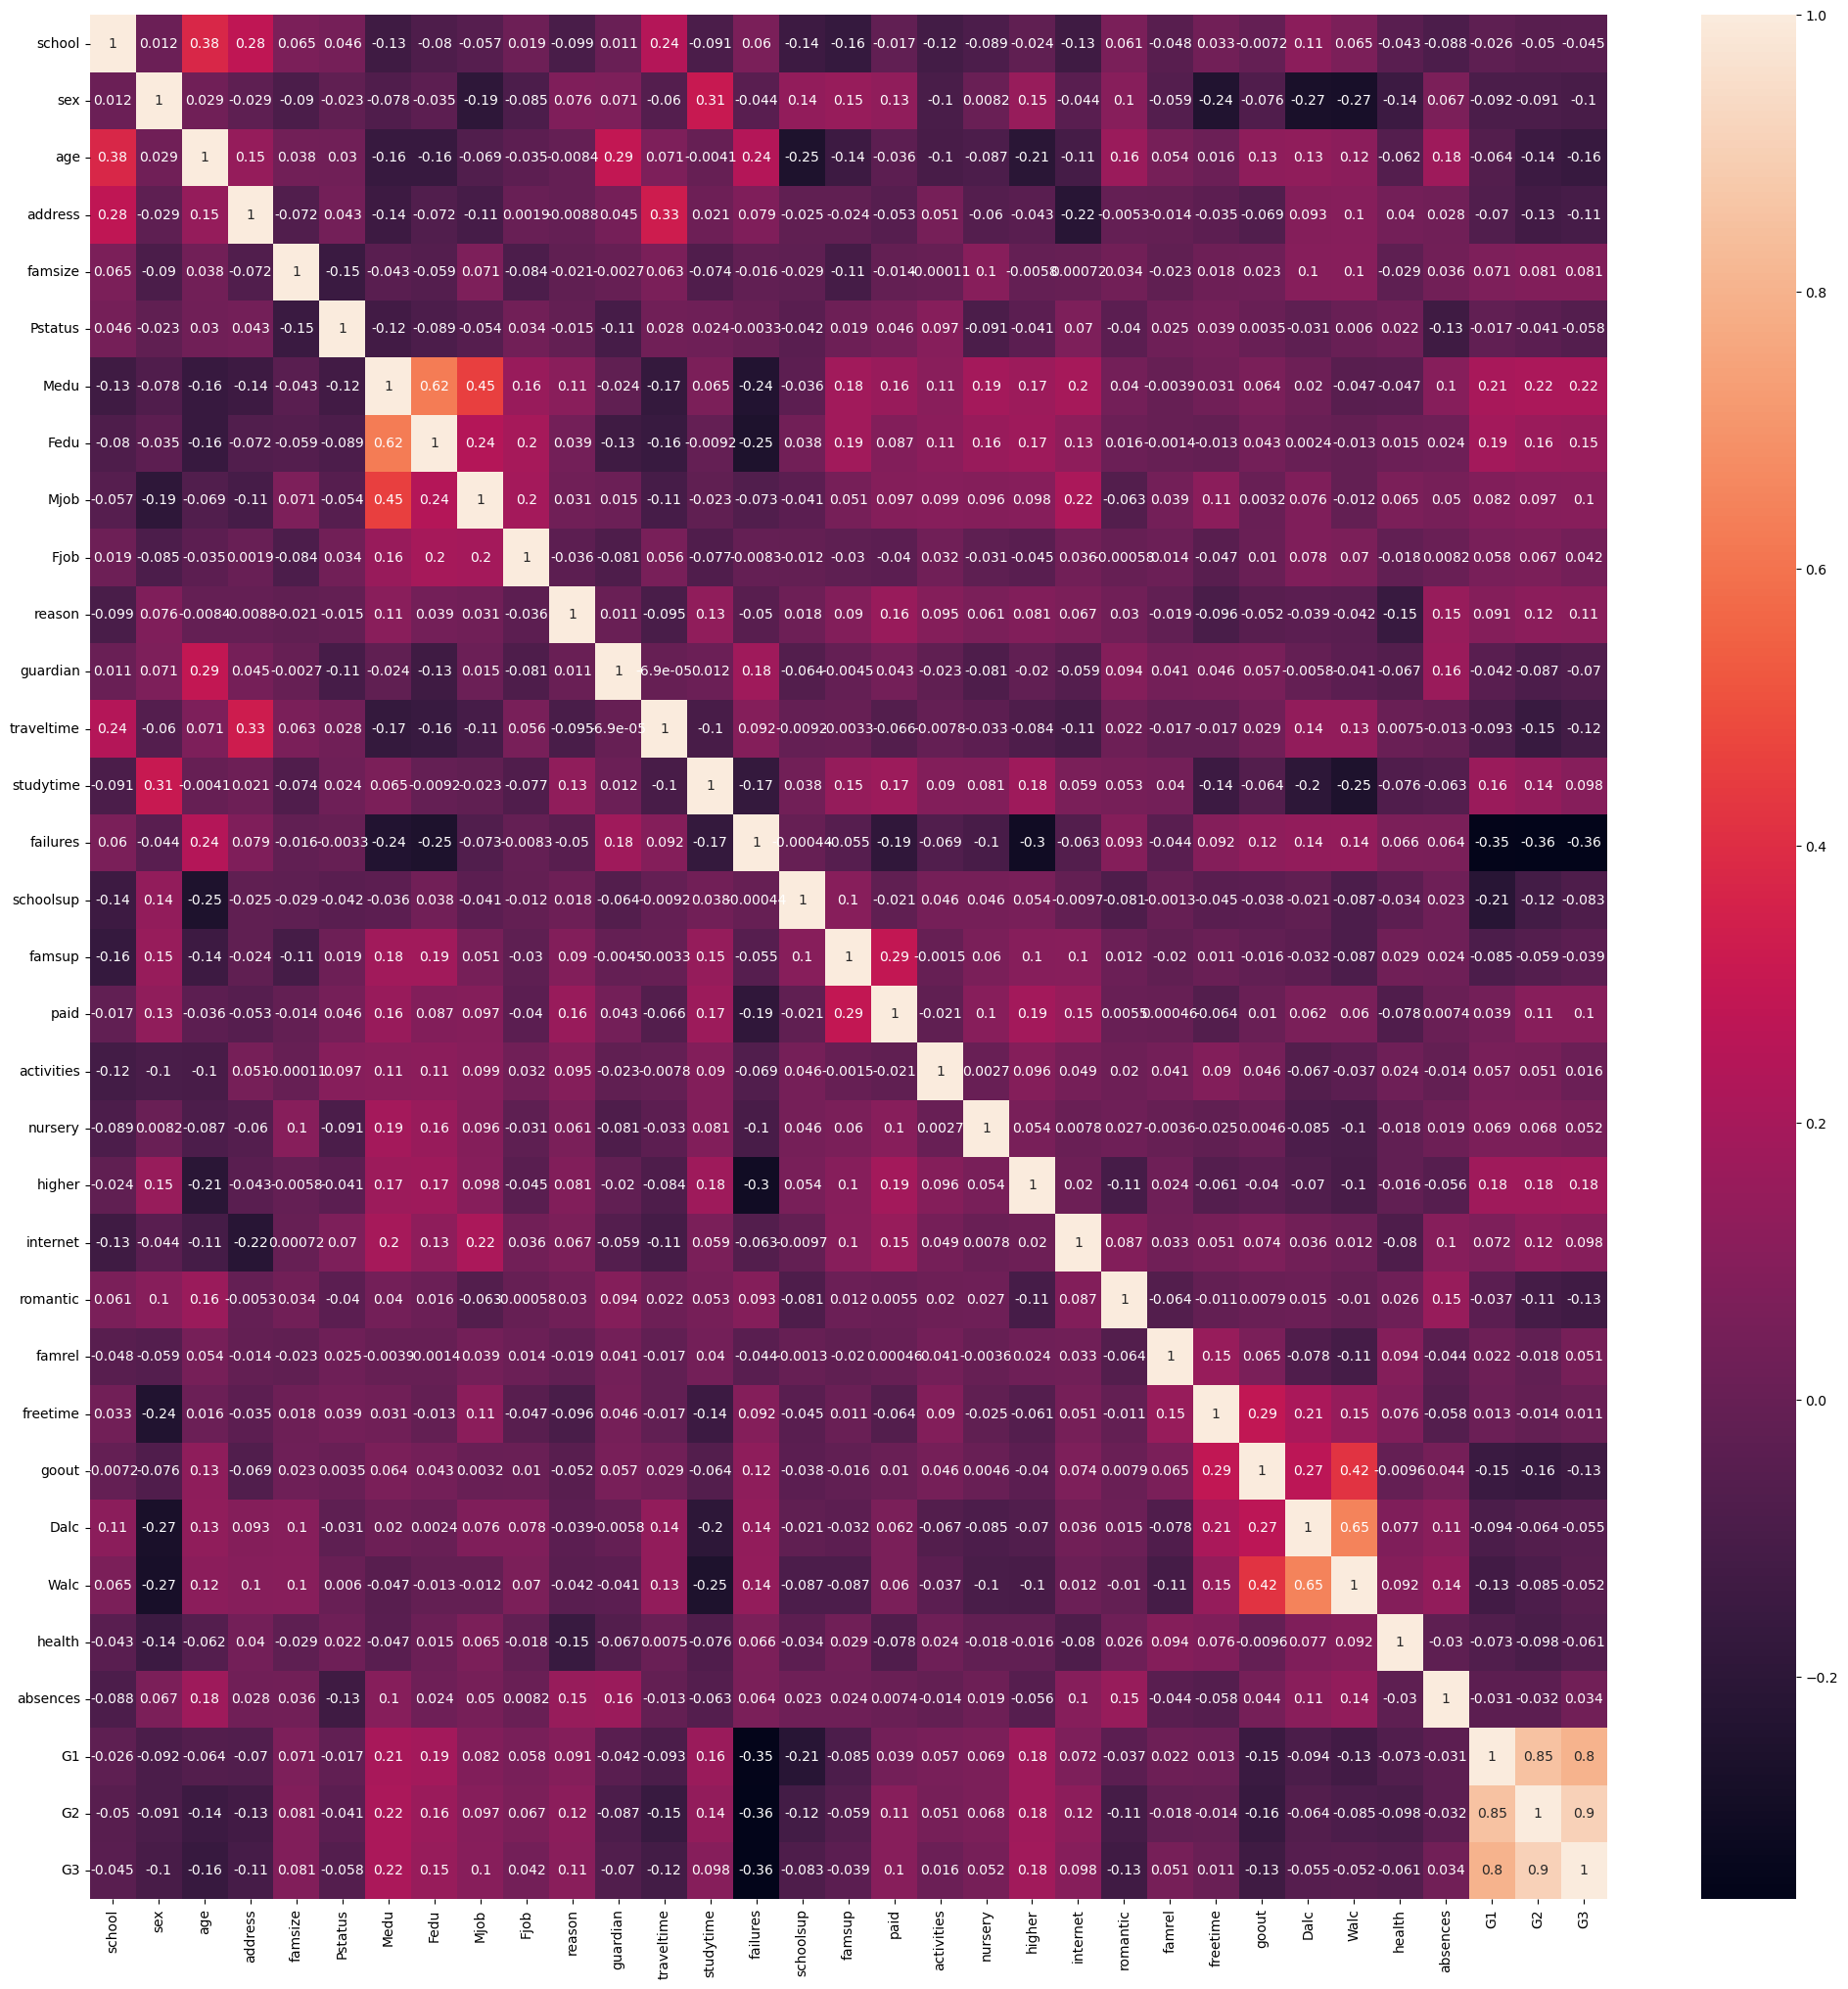

In [91]:
# add correlation matrix to see which features are highly correlated
corr_data = data.select_dtypes(include='number')
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(corr, annot=True)

# features highly correlated with sex: Dalc(-), Walc(-), studytime, freetime(-), Mjob(-), health(-), G3, famsup, Medu(-), romantic

In [108]:
X = data.drop(columns=['G3', 'sex'])
X = sm.add_constant(X)

y = data['G3']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.1
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          2.65e-238
Time:                        18:26:10   Log-Likelihood:                -1048.5
No. Observations:                 649   AIC:                             2161.
Df Residuals:                     617   BIC:                             2304.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2675      0.915      0.292      0.770      -1.530       2.065
school        -0.2177      0.124     -1.759      0.079      -0.461       0.025
age            0.0406      0.047      0.861      0.390      -0.052       0.133
address       -0.1234      0.121     -1.018      0.309      -0.361       0.115
famsize        0.0279      0.114      0.245      0.806      -0.195       0.251
Pstatus       -0.1067      0.161     -0.662      0.508      -0.423       0.210
Medu          -0.0630      0.064     -0.979      0.328      -0.189       0.063
Fedu           0.0508      0.061      0.833      0.405      -0.069       0.170
Mjob           0.0182      0.046      0.392      0.695      -0.073       0.109
Fjob          -0.1219      0.060     -2.021      0.044      -0.240      -0.003
reason        -0.0767      0.042     -1.832      0.067      -0.159       0.005
guardian       0.0518      0.103      0.503      0.615      -0.151       0.254
traveltime     0.1350      0.073      1.840      0.066      -0.009       0.279
studytime      0.0562      0.065      0.868      0.386      -0.071       0.183
failures      -0.2413      0.098     -2.471      0.014      -0.433      -0.050
schoolsup     -0.1817      0.170     -1.069      0.285      -0.515       0.152
famsup         0.1460      0.105      1.392      0.165      -0.060       0.352
fatherd       -0.2222      0.214     -1.039      0.299      -0.642       0.198
activities     0.0251      0.102      0.245      0.806      -0.176       0.226
nursery       -0.0887      0.126     -0.702      0.483      -0.337       0.159
higher         0.2104      0.181      1.163      0.245      -0.145       0.565
internet       0.1129      0.128      0.884      0.377      -0.138       0.364
romantic      -0.0382      0.106     -0.358      0.720      -0.247       0.171
famrel        -0.0310      0.054     -0.576      0.565      -0.137       0.075
freetime      -0.0474      0.052     -0.912      0.362      -0.149       0.055
goout         -0.0208      0.049     -0.420      0.674      -0.118       0.076
Dalc          -0.0708      0.070     -1.018      0.309      -0.207       0.066
Walc          -0.0190      0.054     -0.354      0.723      -0.125       0.087
health        -0.0586      0.036     -1.646      0.100      -0.129       0.011
absences       0.0146      0.012      1.254      0.210      -0.008       0.037
G1             0.1320      0.038      3.519      0.000       0.058       0.206
G2             0.8735      0.035     25.094      0.000       0.805       0.942
==============================================================================
Omnibus:                      441.955   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9293.409
Skew:                          -2.710   Prob(JB):                         0.00
Ku

In [110]:
X = data.drop(columns=['G3', 'sex'])
X = sm.add_constant(X)

y = data['G3']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     63.13
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          1.62e-126
Time:                        18:31:03   Log-Likelihood:                -794.82
No. Observations:                 395   AIC:                             1654.
Df Residuals:                     363   BIC:                             1781.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2423      1.887     -0.128      0.898      -3.954       3.469
school         0.4436      0.356      1.247      0.213      -0.256       1.143
age           -0.2009      0.095     -2.104      0.036      -0.389      -0.013
address       -0.0035      0.261     -0.013      0.989      -0.517       0.510
famsize        0.0358      0.222      0.161      0.872      -0.402       0.473
Pstatus       -0.1453      0.330     -0.440      0.660      -0.795       0.504
Medu           0.1399      0.129      1.085      0.279      -0.114       0.393
Fedu          -0.1317      0.120     -1.101      0.272      -0.367       0.103
Mjob           0.0263      0.093      0.284      0.777      -0.156       0.209
Fjob          -0.1161      0.118     -0.985      0.326      -0.348       0.116
reason         0.0271      0.082      0.330      0.742      -0.134       0.189
guardian       0.0756      0.196      0.386      0.700      -0.310       0.461
traveltime     0.1041      0.153      0.678      0.498      -0.198       0.406
studytime     -0.1251      0.127     -0.984      0.326      -0.375       0.125
failures      -0.2068      0.152     -1.362      0.174      -0.505       0.092
schoolsup      0.4748      0.311      1.527      0.128      -0.137       1.086
famsup         0.1528      0.219      0.698      0.486      -0.278       0.583
paid           0.0524      0.217      0.241      0.809      -0.374       0.479
activities    -0.3459      0.201     -1.725      0.085      -0.740       0.049
nursery       -0.2168      0.248     -0.875      0.382      -0.704       0.271
higher         0.0533      0.480      0.111      0.912      -0.891       0.998
internet      -0.1960      0.280     -0.699      0.485      -0.747       0.355
romantic      -0.2780      0.215     -1.293      0.197      -0.701       0.145
famrel         0.3568      0.111      3.205      0.001       0.138       0.576
freetime       0.0608      0.107      0.570      0.569      -0.149       0.271
goout          0.0215      0.103      0.210      0.834      -0.180       0.223
Dalc          -0.1692      0.146     -1.160      0.247      -0.456       0.118
Walc           0.1799      0.110      1.634      0.103      -0.037       0.396
health         0.0691      0.072      0.954      0.341      -0.073       0.211
absences       0.0436      0.013      3.330      0.001       0.018       0.069
G1             0.1909      0.059      3.217      0.001       0.074       0.308
G2             0.9585      0.052     18.424      0.000       0.856       1.061
==============================================================================
Omnibus:                      185.511   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.595
Skew:                          -2.048   Prob(JB):                    1.09e-188
Ku

In [98]:
# split data for training and testing (80:20), use all features except predictor and sensitive attribute
features = data.drop(columns=['G3', 'sex'])
X = features
y = data['G3'] # predict final grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# binary classifier: pass if >= 10, else fail

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] >= 10:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] >= 10:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

# we use SVM, paper tried 5 different models
clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) # 93.1% accuracy

0.9307692307692308

In [101]:
# 5 level classification as defined in paper
y_train_5 = y_train.replace(to_replace=[[20, 19, 18, 17, 16], [15, 14], [13, 12], [11, 10], [9,8,7,6,5,4,3,2,1]], value=[1, 2, 3, 4, 5])
y_test_5 = y_test.replace(to_replace=[[20, 19, 18, 17, 16], [15, 14], [13, 12], [11, 10], [9,8,7,6,5,4,3,2,1]], value=[1, 2, 3, 4, 5])
clf = svm.SVC().fit(X_train, y_train_5)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_5, pred) # 70% accuracy

0.7

In [102]:
# regression: score determined by RMSE

regr = svm.SVR().fit(X_train, y_train)
pred = regr.predict(X_test)
metrics.mean_squared_error(y_test, pred) # 1.70

1.6980659535368896

In [107]:
# classification: try to predict sensitive attribute (sex) using highly correlated features
features = data[['Dalc', 'Walc', 'studytime', 'freetime']]
X = features
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred) # 75.4% accuracy

0.7538461538461538